# Implementation of Deep Convolutional GANs
Reference: https://arxiv.org/pdf/1511.06434.pdf

#Mount

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd /content/gdrive/My\ Drive/EVA2/Assignment6

Mounted at /content/gdrive
/content/gdrive/My Drive/EVA2/Assignment6


#Import

In [2]:
import torch
import torchvision
import numpy as np
import datetime
import os, sys
from matplotlib.pyplot import imshow, imsave
import cudas
import general_utils
from Transform_utils.transforme_album import Data
from models.GD import Generator, Discriminator
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec

CUDA Available? True


#Unzip

In [4]:
!unzip -q IndianCars.zip -d /content/ZData/
!mkdir /content/ZData/Train
!mv /content/ZData/IndianCars /content/ZData/Train/

#Models

In [5]:
general_utils.getmeanstd('/content/ZData/Train/IndianCars/*')


Mean: - [0.7270403932555622, 0.7072142289814666, 0.707761554685679]
stdDev: - [0.3278671301794193, 0.3401683504330765, 0.33884424002558444]


([0.7270403932555622, 0.7072142289814666, 0.707761554685679],
 [0.3278671301794193, 0.3401683504330765, 0.33884424002558444])

Train Data size 512


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([8, 3, 128, 128])


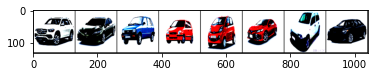

In [5]:
data = Data()
trainset = data.getTrainDataSet(train=True)
trainloader = data.getDataLoader(trainset, 32)
trainloader1 = data.getDataLoader(trainset, 8)
classes = ('Cars')
batch_size = 32
# get some random training images
dataiter = iter(trainloader1)
images, labels = dataiter.next()
print(images.shape)
general_utils.imshow(torchvision.utils.make_grid(images))

In [6]:
IMAGE_DIM = (128, 128, 3)
device = torch.device("cuda" if cudas.cuda else "cpu")
D = Discriminator(in_channel=3).to(device)
G = Generator(out_channel=3).to(device)

In [7]:
from torchsummary import summary
summary(D, input_size=(3, 256, 256))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 128, 128]           1,728
       BatchNorm2d-2         [-1, 64, 128, 128]             128
         LeakyReLU-3         [-1, 64, 128, 128]               0
            Conv2d-4          [-1, 128, 64, 64]          73,728
       BatchNorm2d-5          [-1, 128, 64, 64]             256
         LeakyReLU-6          [-1, 128, 64, 64]               0
            Conv2d-7          [-1, 256, 32, 32]         294,912
       BatchNorm2d-8          [-1, 256, 32, 32]             512
         LeakyReLU-9          [-1, 256, 32, 32]               0
           Conv2d-10          [-1, 256, 16, 16]         589,824
      BatchNorm2d-11          [-1, 256, 16, 16]             512
        LeakyReLU-12          [-1, 256, 16, 16]               0
AdaptiveAvgPool2d-13            [-1, 256, 1, 1]               0
           Linear-14                   

In [8]:
summary(G, input_size=(1,100))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                [-1, 32768]       3,309,568
         LeakyReLU-2                [-1, 32768]               0
            Conv2d-3            [-1, 512, 8, 8]       2,359,296
       BatchNorm2d-4            [-1, 512, 8, 8]           1,024
         LeakyReLU-5            [-1, 512, 8, 8]               0
   ConvTranspose2d-6          [-1, 256, 16, 16]       2,097,152
       BatchNorm2d-7          [-1, 256, 16, 16]             512
         LeakyReLU-8          [-1, 256, 16, 16]               0
            Conv2d-9          [-1, 256, 16, 16]         589,824
      BatchNorm2d-10          [-1, 256, 16, 16]             512
        LeakyReLU-11          [-1, 256, 16, 16]               0
           Conv2d-12          [-1, 256, 16, 16]         589,824
      BatchNorm2d-13          [-1, 256, 16, 16]             512
        LeakyReLU-14          [-1, 256,

In [9]:
def get_sample_image(G, n_noise):
    z = torch.randn(36, n_noise).to(device)
    y_hat = G(z).view(36, 3, 128, 128).permute(0, 2, 3, 1) # (100, 28, 28)
    result = (y_hat.detach().cpu().numpy()+1)/2.
    return result

In [8]:
step = 0
n_noise = 100
batch_size = 32
D_labels = torch.ones([batch_size, 1]).to(device) # Discriminator Label to real
D_fakes = torch.zeros([batch_size, 1]).to(device) # Discriminator Label to fake
criterion = nn.BCELoss()
G_opt = torch.optim.Adam(G.parameters(), lr=0.0002, betas=(0.5, 0.999))
D_opt = torch.optim.Adam(D.parameters(), lr=0.0001, betas=(0.5, 0.999))

NameError: ignored

Epoch: 0/1500, Step: 0, D Loss: 1.3936, G Loss: 0.6265, Time:14:10:43
Epoch: 3/1500, Step: 50, D Loss: 1.2635, G Loss: 0.7849, Time:14:10:52
Epoch: 6/1500, Step: 100, D Loss: 1.3712, G Loss: 0.7444, Time:14:11:00
Epoch: 9/1500, Step: 150, D Loss: 1.3330, G Loss: 0.7570, Time:14:11:08
Epoch: 12/1500, Step: 200, D Loss: 1.3138, G Loss: 0.7592, Time:14:11:17
Epoch: 15/1500, Step: 250, D Loss: 1.3294, G Loss: 0.7555, Time:14:11:25
Epoch: 18/1500, Step: 300, D Loss: 1.3459, G Loss: 0.7387, Time:14:11:33
Epoch: 21/1500, Step: 350, D Loss: 1.3509, G Loss: 0.7396, Time:14:11:41
Epoch: 25/1500, Step: 400, D Loss: 1.3262, G Loss: 0.7452, Time:14:11:49
Epoch: 28/1500, Step: 450, D Loss: 1.3469, G Loss: 0.7595, Time:14:11:57
Epoch: 31/1500, Step: 500, D Loss: 1.3245, G Loss: 0.7643, Time:14:12:05
Epoch: 34/1500, Step: 550, D Loss: 1.2984, G Loss: 0.7575, Time:14:12:14
Epoch: 37/1500, Step: 600, D Loss: 1.3385, G Loss: 0.8009, Time:14:12:22
Epoch: 40/1500, Step: 650, D Loss: 1.3441, G Loss: 0.7527,

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:50: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Epoch: 1003/1500, Step: 16050, D Loss: 0.4963, G Loss: 2.1509, Time:14:56:19
Epoch: 1006/1500, Step: 16100, D Loss: 0.3328, G Loss: 2.2094, Time:14:56:28
Epoch: 1009/1500, Step: 16150, D Loss: 0.5626, G Loss: 1.9198, Time:14:56:36
Epoch: 1012/1500, Step: 16200, D Loss: 0.5503, G Loss: 2.2324, Time:14:56:45
Epoch: 1015/1500, Step: 16250, D Loss: 0.6010, G Loss: 1.5439, Time:14:56:53
Epoch: 1018/1500, Step: 16300, D Loss: 0.3427, G Loss: 2.1402, Time:14:57:02
Epoch: 1021/1500, Step: 16350, D Loss: 0.3848, G Loss: 2.5878, Time:14:57:11
Epoch: 1025/1500, Step: 16400, D Loss: 0.2753, G Loss: 2.8212, Time:14:57:19
Epoch: 1028/1500, Step: 16450, D Loss: 0.3513, G Loss: 2.2531, Time:14:57:28
Epoch: 1031/1500, Step: 16500, D Loss: 0.3377, G Loss: 1.9987, Time:14:57:37
Epoch: 1034/1500, Step: 16550, D Loss: 0.5574, G Loss: 1.7278, Time:14:57:46
Epoch: 1037/1500, Step: 16600, D Loss: 0.3348, G Loss: 2.8176, Time:14:57:54
Epoch: 1040/1500, Step: 16650, D Loss: 0.2757, G Loss: 2.4311, Time:14:58:03

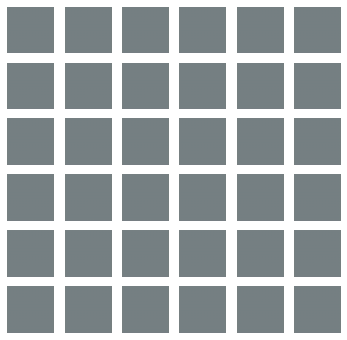

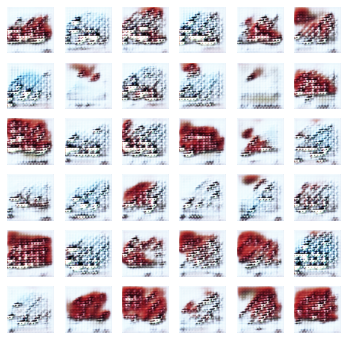

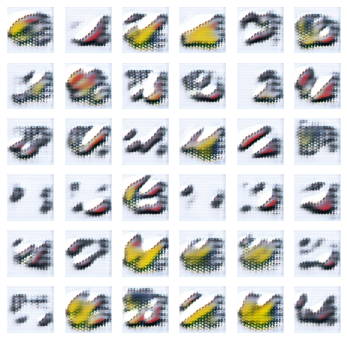

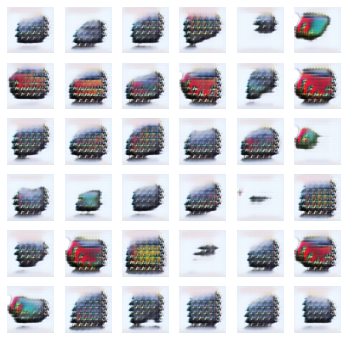

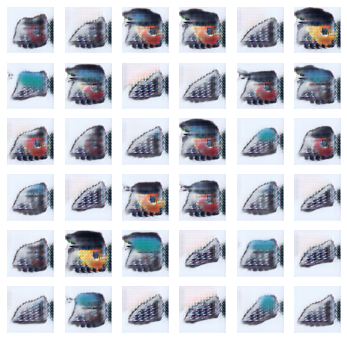

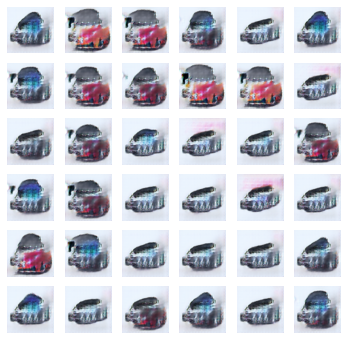

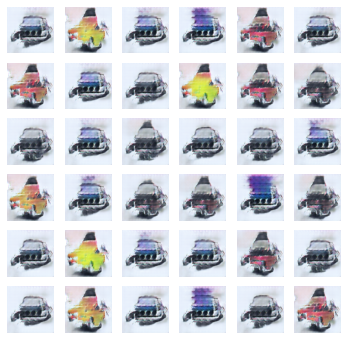

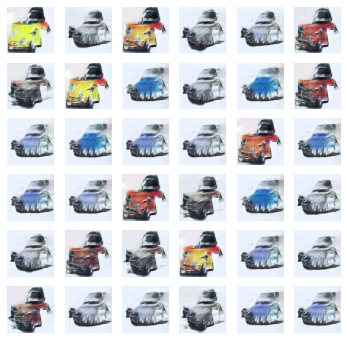

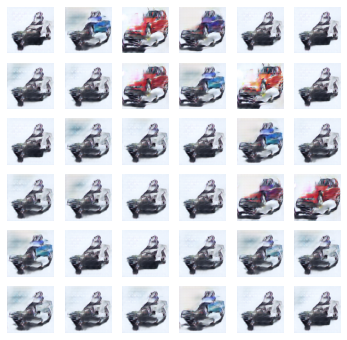

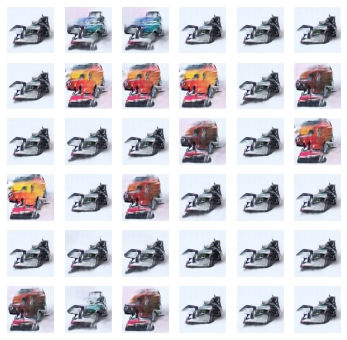

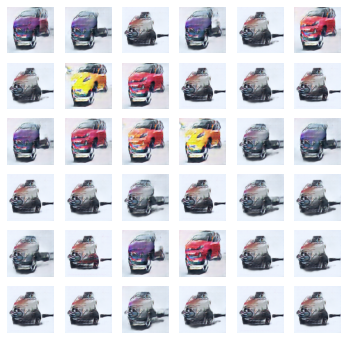

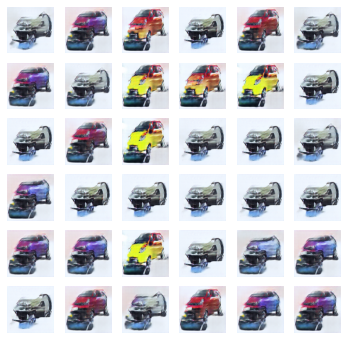

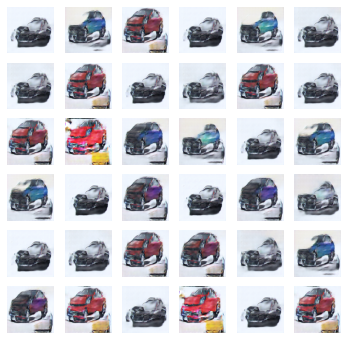

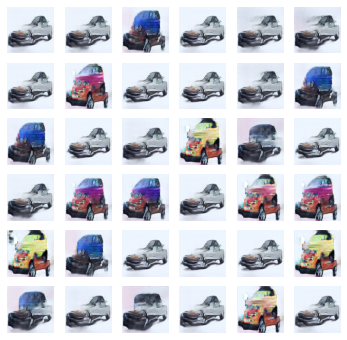

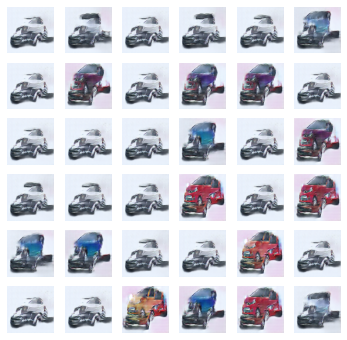

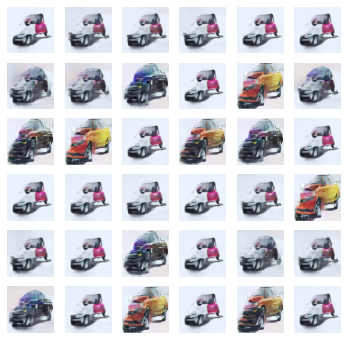

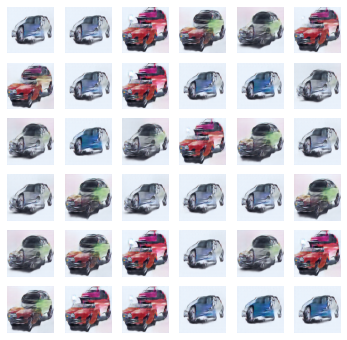

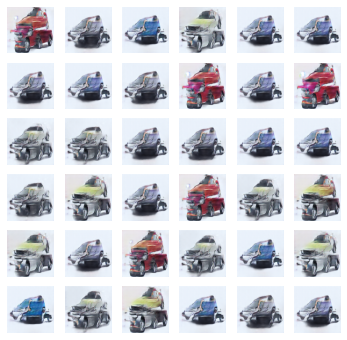

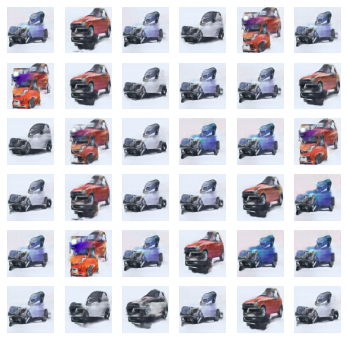

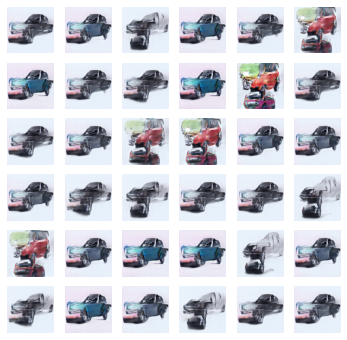

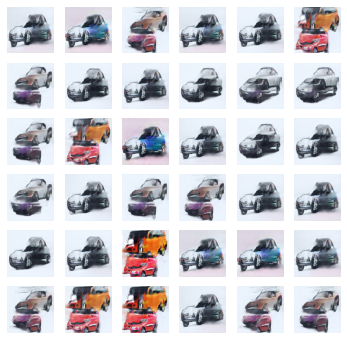

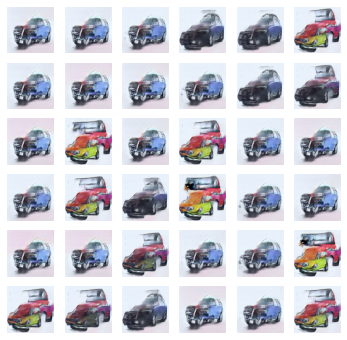

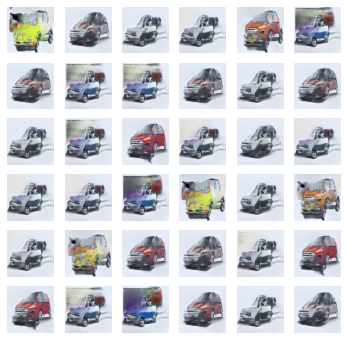

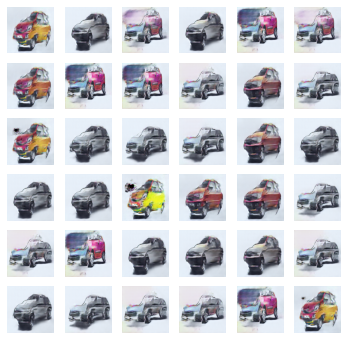

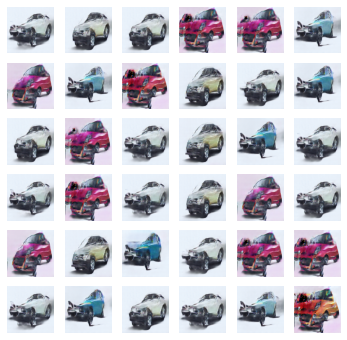

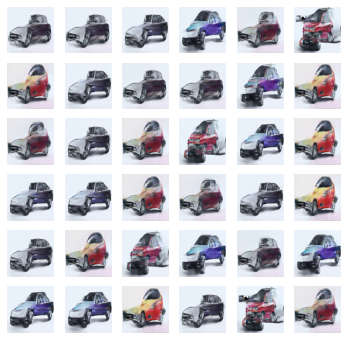

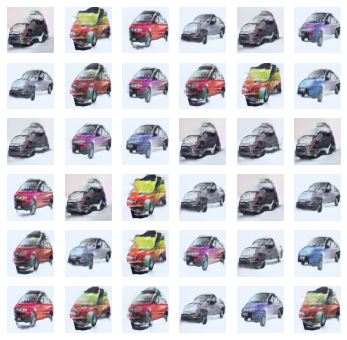

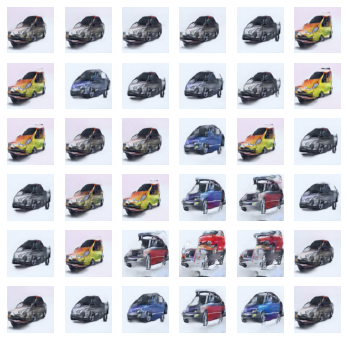

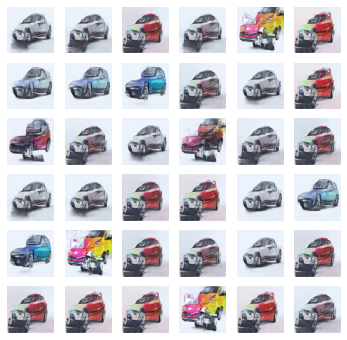

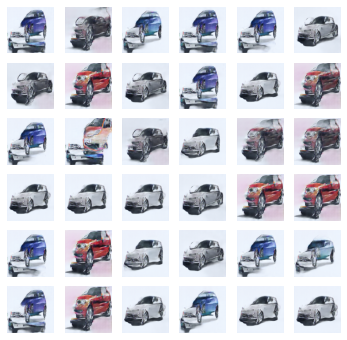

In [11]:
diff=10
max_epoch=1500
Gl_loss = []
Dl_loss = []
for epoch in range(max_epoch):
    for idx, (data, target) in enumerate(trainloader):
        # Training Discriminator
        #x = images.to(device)
        x, target = data.to(device), target.to(device)
        x_outputs = D(x)
        x_outputs.shape[0]
        D_x_loss = criterion(x_outputs, D_labels)

        z = torch.randn(batch_size, n_noise).to(device)
        z_outputs = D(G(z))
        D_z_loss = criterion(z_outputs, D_fakes)
        D_loss = D_x_loss + D_z_loss
        
        D.zero_grad()
        D_loss.backward()
        D_opt.step()
        
        #train Generator
        z = torch.randn(batch_size, n_noise).to(device)
        z_outputs = D(G(z))
        G_loss = criterion(z_outputs, D_labels)
        
        #if(epoch%5==0):
        #  torch.save(G.state_dict(), 'Generated_models/Model_'+str(epoch%50)+'.pt')
        
        Gl_loss.append(G_loss)
        Dl_loss.append(D_loss)
        D.zero_grad()
        G.zero_grad()
        G_loss.backward()
        G_opt.step()
        
        if step % 50 == 0:
            dt = datetime.datetime.now().strftime('%H:%M:%S')
            print('Epoch: {}/{}, Step: {}, D Loss: {:.4f}, G Loss: {:.4f}, Time:{}'.format(epoch, max_epoch, step, D_loss.item(), G_loss.item(), dt))
            G.eval()
            img = get_sample_image(G, n_noise)
            if epoch%50==0:
              if epoch>600 and epoch%100==0:
                  torch.save(G.state_dict(), 'Generated_models/Model_'+str(epoch)+'_Gloss_'+str(G_loss)+'_Dloss_'+str(D_loss)+'.pt')
              elif epoch>1000:
                  torch.save(G.state_dict(), 'Generated_models/Model_'+str(epoch)+'_Gloss_'+str(G_loss)+'_Dloss_'+str(D_loss)+'.pt')
              plt.figure(figsize = (6,6))
              gs1 = gridspec.GridSpec(6, 6)
              gs1.update(wspace=0.0, hspace=0.0) # set the spacing between axes. 
              for i in range(1,37):
                plt.subplot(6, 6, i)
                plt.axis('off')
                plt.imshow(img[i-1], 'gray')
              plt.savefig('/content/ZData/im_'+str(epoch)+'.jpg', bbox_inches='tight') # To save figure
            G.train()
        step += 1

#Plotting generator vs Discriminator loss curve

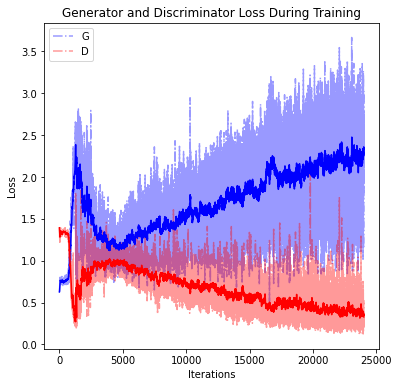

In [13]:
def smooth_curv(scalars, weight):  # Weight between 0 and 1
    last = scalars[0]  # First value in the plot (first timestep)
    smoothed = list()
    for point in scalars:
        smoothed_val = last * weight + (1 - weight) * point  # Calculate smoothed value
        smoothed.append(smoothed_val)                        # Save it
        last = smoothed_val                                  # Anchor the last smoothed value
    return np.array(smoothed)
    
plt.figure(figsize = (6,6))
plt.title("Generator and Discriminator Loss During Training")
plt.plot(Gl_loss, 'b-.',label="G", alpha=0.4)
plt.plot(Dl_loss, 'r-.', label="D", alpha=0.4)
plt.plot(smooth_curv(Gl_loss, 0.95), 'b')
plt.plot(smooth_curv(Dl_loss, 0.95), 'r')
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()

##Saving and loading gpu model

In [10]:
modelnet = Generator(out_channel=3).to(device)
modelnet.load_state_dict(torch.load('Generated_models/Model_1351.pt'), strict=False)
modelnet.eval()

Generator(
  (fc): Sequential(
    (0): Linear(in_features=100, out_features=32768, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
  )
  (conv): Sequential(
    (0): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.2)
    (3): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (4): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): LeakyReLU(negative_slope=0.2)
    (6): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (7): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): LeakyReLU(negative_slope=0.2)
    (9): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (10): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=Tru

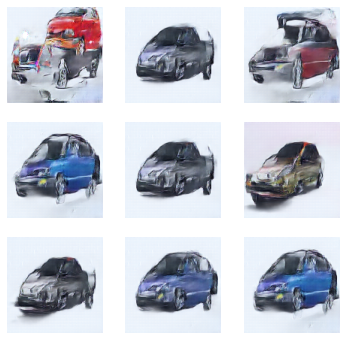

In [11]:
# generation to image
img = get_sample_image(modelnet, 100)
plt.figure(figsize = (6,6))
gs1 = gridspec.GridSpec(6, 6)
gs1.update(wspace=0.0, hspace=0.0) # set the spacing between axes. 
for i in range(1,10):
        plt.subplot(3, 3, i)
        plt.axis('off')
        plt.imshow(img[2*(i)+3], 'gray')
plt.show()    

Saving and loading jit cpu model

In [28]:
modelnet.to('cpu')
modelnet.eval()
traced_model = torch.jit.trace(modelnet,torch.randn(36,100))
traced_model.save('jitmodel.pt')

In [9]:
modelnet = Generator(out_channel=3).to('cpu')
loaded_compiled_model = torch.jit.load('Generated_models/jitmodel.pt')
loaded_compiled_model.eval()

RecursiveScriptModule(
  original_name=Generator
  (fc): RecursiveScriptModule(
    original_name=Sequential
    (0): RecursiveScriptModule(original_name=Linear)
    (1): RecursiveScriptModule(original_name=LeakyReLU)
  )
  (conv): RecursiveScriptModule(
    original_name=Sequential
    (0): RecursiveScriptModule(original_name=Conv2d)
    (1): RecursiveScriptModule(original_name=BatchNorm2d)
    (2): RecursiveScriptModule(original_name=LeakyReLU)
    (3): RecursiveScriptModule(original_name=ConvTranspose2d)
    (4): RecursiveScriptModule(original_name=BatchNorm2d)
    (5): RecursiveScriptModule(original_name=LeakyReLU)
    (6): RecursiveScriptModule(original_name=Conv2d)
    (7): RecursiveScriptModule(original_name=BatchNorm2d)
    (8): RecursiveScriptModule(original_name=LeakyReLU)
    (9): RecursiveScriptModule(original_name=Conv2d)
    (10): RecursiveScriptModule(original_name=BatchNorm2d)
    (11): RecursiveScriptModule(original_name=LeakyReLU)
    (12): RecursiveScriptModule(origi

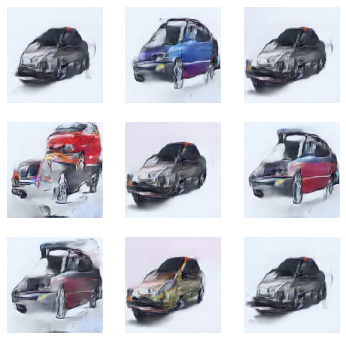

In [11]:
# generation to image
img = get_sample_image(loaded_compiled_model, 100)
plt.figure(figsize = (6,6))
gs1 = gridspec.GridSpec(6, 6)
gs1.update(wspace=0.0, hspace=0.0) # set the spacing between axes. 
for i in range(1,10):
        plt.subplot(3, 3, i)
        plt.axis('off')
        plt.imshow(img[2*(i)+3], 'gray')
plt.show()    

In [14]:
!pip install onnx onnxruntime

     |████████████████████████████████| 7.4MB 4.7MB/s 
     |████████████████████████████████| 4.4MB 54.2MB/s 


In [17]:
import io
import numpy as np
import torch.onnx
import copy

In [12]:
def print_size_of_model(model):
    torch.save(model.state_dict(), "temp.p")
    print('Size (MB):', os.path.getsize("temp.p")/1e6)
    os.remove('temp.p')

def print_size_of_onnx_model(model):
    onnx.save(model, 'temp.onnx')
    print('Size (MB):', os.path.getsize("temp.onnx")/1e6)
    os.remove('temp.onnx')

In [15]:
print_size_of_model(modelnet)

Size (MB): 39.941668


In [19]:
# Input to the model
torch_model = copy.deepcopy(modelnet)
torch_model = torch_model.to(device)
print(next(torch_model.parameters()).is_cuda)
batch_size = 1
x = torch.randn(36,100, requires_grad=True)
x = x.to(device)
torch_out = torch_model(x)

# Export the model
torch.onnx.export(torch_model,               # model being run
                  x,                         # model input (or a tuple for multiple inputs)
                  "Generated_models/cars.onnx",   # where to save the model (can be a file or file-like object)
                  export_params=True,        # store the trained parameter weights inside the model file
                  # verbose = True,
                  opset_version=10,          # the ONNX version to export the model to
                  do_constant_folding=True,  # whether to execute constant folding for optimization
                  input_names = ['input'],   # the model's input names
                  output_names = ['output'], # the model's output names
                  dynamic_axes={'input' : {0 : 'batch_size'},    # variable lenght axes
                                'output' : {0 : 'batch_size'}})

True


In [20]:
torch_out.shape

torch.Size([36, 3, 128, 128])

In [60]:
import onnx

onnx_model = onnx.load("Generated_models/cars.onnx")

## verify the model’s structure and confirm that the model has a valid schema ##
onnx.checker.check_model(onnx_model)

In [22]:
print_size_of_onnx_model(onnx_model)

Size (MB): 39.926909


In [61]:
import onnxruntime

ort_session = onnxruntime.InferenceSession("Generated_models/cars.onnx")

def to_numpy(tensor):
    return tensor.detach().cpu().numpy() if tensor.requires_grad else tensor.cpu().numpy()

# compute ONNX Runtime output prediction
z = torch.randn(36, 100).to('cpu')
z1 = z.numpy()
ort_inputs = {ort_session.get_inputs()[0].name:z1}
ort_outs = ort_session.run(None, ort_inputs)
np.array(ort_outs).shape

(1, 36, 3, 128, 128)

In [31]:
from onnxruntime.quantization import quantize
from onnxruntime.quantization import QuantizationMode

In [56]:
quantized_model = quantize(onnx_model, quantization_mode=QuantizationMode.IntegerOps, static=False)
onnx.save(quantized_model, 'Generated_models/cars.quantized.onnx')
print_size_of_onnx_model(quantized_model)

Size (MB): 28.212574


In [57]:
import onnxruntime

ort_session = onnxruntime.InferenceSession("Generated_models/cars.quantized.onnx")

def to_numpy(tensor):
    return tensor.detach().cpu().numpy() if tensor.requires_grad else tensor.cpu().numpy()

# compute ONNX Runtime output prediction
z = torch.randn(36, 100).to('cpu')
z1 = z.numpy()
ort_inputs = {ort_session.get_inputs()[0].name:z1}
ort_outs = ort_session.run(None, ort_inputs)
np.array(ort_outs).shape

(1, 36, 3, 128, 128)

In [63]:
ort_outs1 = ort_outs[0]
ort_outs1.shape

(36, 3, 128, 128)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


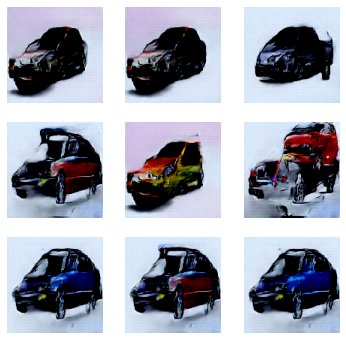

In [64]:
img = np.transpose(ort_outs1, (0, 2, 3, 1))
plt.figure(figsize = (6,6))
gs1 = gridspec.GridSpec(6, 6)
gs1.update(wspace=0.0, hspace=0.0) # set the spacing between axes. 
for i in range(1,10):
        plt.subplot(3, 3, i)
        plt.axis('off')
        plt.imshow(img[2*(i)+3], 'gray')
plt.show() 